In [4]:
from vtl.Readfile import Readfile
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sea
import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.io import fits,ascii
from glob import glob
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})

In [5]:
def Get_file_list(gal_id):
    gal_dir = '../../../../../Volumes/Vince_homedrive/Extractions/Quiescent_galaxies/%s/' % gal_id
    one_d = glob(gal_dir + '*1D.fits')    
    two_d = glob(gal_dir + '*png')    
    one_d_l = [len(U) for U in one_d]
    one_d_s = one_d[np.argmin(one_d_l)]
    one_d_e = np.delete(one_d,[np.argmin(one_d_l)])
    return one_d_e, one_d_s, two_d

def Get_flux(FILE):
    observ = fits.open(FILE)
    w = np.array(observ[1].data.field('wave'))
    f = np.array(observ[1].data.field('flux')) * 1E-17
    sens = np.array(observ[1].data.field('sensitivity'))
    contam = np.array(observ[1].data.field('contam')) * 1E-17
    e = np.array(observ[1].data.field('error')) * 1E-17
    f -= contam
    f /= sens
    e /= sens

    INDEX = []
    for i in range(len(w)):
        if w[i] < 11900:
            INDEX.append(i)

    w = w[INDEX]
    f = f[INDEX]
    e = e[INDEX]

    for i in range(len(f)):
        if f[i] < 0:
            f[i] = 0

    return w, f, e

In [6]:
qgalDB = pd.read_pickle('../data/quiescent_gal_DB.pkl')
good_gals = list(qgalDB[qgalDB['in_data'] == True][qgalDB['agn'] == False]['gids'])

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


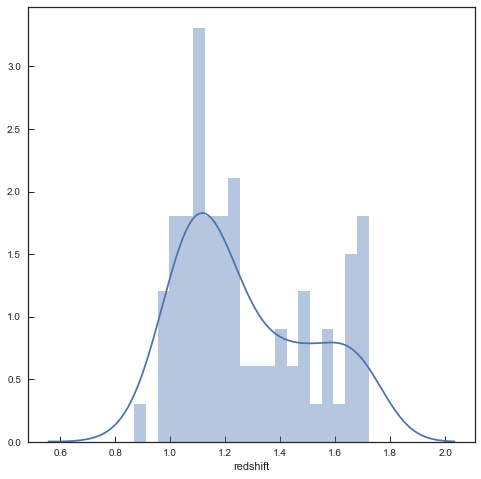

In [7]:
%matplotlib inline
plt.figure(figsize=[8,8])
sea.distplot(qgalDB[qgalDB['in_data'] == True][qgalDB['agn'] == False]['redshift'],bins=20)
plt.show()
plt.close()

In [8]:
qgalDB[qgalDB['in_data'] == True][qgalDB['agn'] == False]

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,gids,ids,redshift,hmag,ra,dec,agn,in_data
21,n8466,8466,1.713,NaN,189.156533,62.184931,False,True
22,n8912,8912,1.175,22.352298,189.065631,62.186165,False,True
23,n8949,8949,1.036,21.152150,189.089179,62.186292,False,True
24,n9056,9056,1.083,20.544222,189.056217,62.188475,False,True
25,n9533,9533,1.217,22.306897,189.027871,62.189327,False,True
26,n9582,9582,0.991,22.033025,189.171432,62.190277,False,True
30,n10338,10338,0.984,20.759360,189.202675,62.194843,False,True
31,n10539,10539,0.991,21.936446,189.202409,62.194459,False,True
34,n11814,11814,1.680,24.701938,189.217095,62.200346,False,True
35,n12173,12173,1.417,23.870501,189.022674,62.201896,False,True


In [9]:
one_d,one_dst,two_d = Get_file_list('s40862')

In [10]:
%matplotlib inline
W = np.array([])
minw = np.zeros(len(one_d))
maxw = np.zeros(len(one_d))
for i in range(len(one_d)):
    wv,fl,er = Get_flux(one_d[i])
    minw[i] = wv[0]
    maxw[i] = wv[-1]
    
    W = np.append(W,wv)
    # plt.figure(figsize=[12,5])
    # plt.plot(wv,fl)
    # plt.plot(wv,er)
    # plt.ylim(0,1E-17)
    # plt.show()
    # plt.close()
    
all_wv=sorted(set(W))
min_all = np.argwhere(all_wv == max(minw))
max_all = np.argwhere(all_wv == min(maxw))
all_wv = all_wv[min_all:max_all]

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [11]:
def Stack_galaxy(spec, wv):
    flgrid = np.zeros([len(spec), len(wv)])
    errgrid = np.zeros([len(spec), len(wv)])
    for i in range(len(spec)):
        wave, flux, error = Get_flux(spec[i])
        ifl = interp1d(wave, flux)
        ier = interp1d(wave, error)
        flgrid[i] = ifl(wv)
        errgrid[i] = ier(wv)
    ################

    flgrid = np.transpose(flgrid)
    errgrid = np.transpose(errgrid)
    weigrid = errgrid ** (-2)
    infmask = np.isinf(weigrid)
    weigrid[infmask] = 0
    ################

    stack, err = np.zeros([2, len(wv)])
    for i in range(len(wv)):
        stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / np.sum(weigrid[i])
        err[i] = 1 / np.sqrt(np.sum(weigrid[i]))
    ################

    return np.array(wv), np.array(stack), np.array(err)

def Stack_galaxy_med(spec, wv):
    flgrid = np.zeros([len(spec), len(wv)])
    errgrid = np.zeros([len(spec), len(wv)])
    for i in range(len(spec)):
        wave, flux, error = Get_flux(spec[i])
        ifl = interp1d(wave, flux)
        ier = interp1d(wave, error)
        flgrid[i] = ifl(wv)
        errgrid[i] = ier(wv)
    ################

    flgrid = np.transpose(flgrid)
    errgrid = np.transpose(errgrid)
    weigrid = errgrid ** (-2)
    infmask = np.isinf(weigrid)
    weigrid[infmask] = 0
    ################

    stack, err = np.zeros([2, len(wv)])
    for i in range(len(wv)):
        stack[i] = np.median(flgrid[i])
        err[i] = 1 / np.sqrt(np.sum(weigrid[i]))
    ################

    return np.array(wv), np.array(stack), np.array(err)

In [12]:
wv,fl,er = Stack_galaxy(one_d,all_wv)
wv2,fl2,er2 = Stack_galaxy_med(one_d,all_wv)

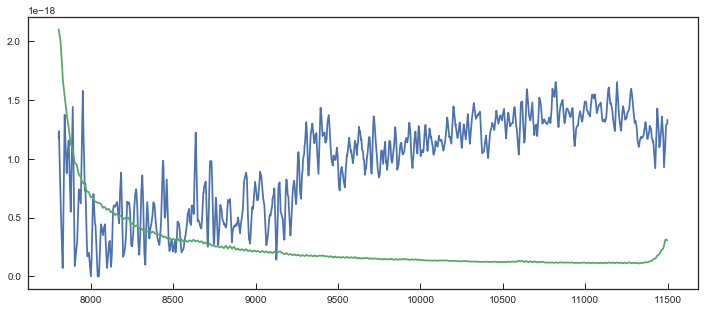

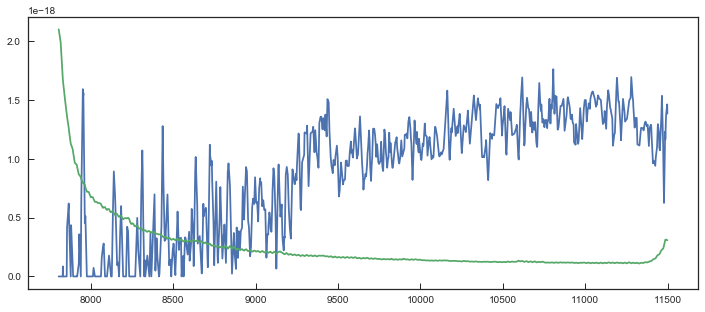

In [13]:
IDX = np.array([U for U in range(len(wv)) if 7800 < wv[U] < 11500]).astype(int)

plt.figure(figsize=[12,5])
plt.plot(wv[IDX],fl[IDX])
plt.plot(wv[IDX],er[IDX])
plt.show()
plt.close()

plt.figure(figsize=[12,5])
plt.plot(wv2[IDX],fl2[IDX])
plt.plot(wv2[IDX],er2[IDX])
plt.show()
plt.close()

In [14]:
speclist = glob('../spec_stacks_june14/*.npy')

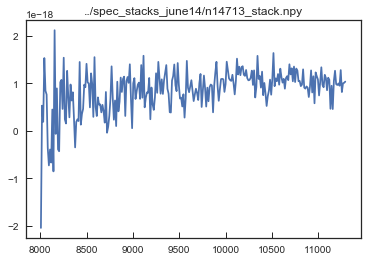

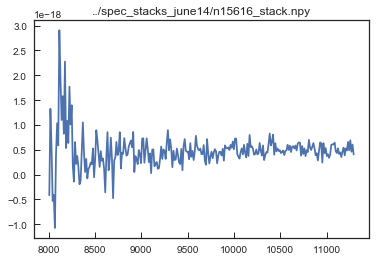

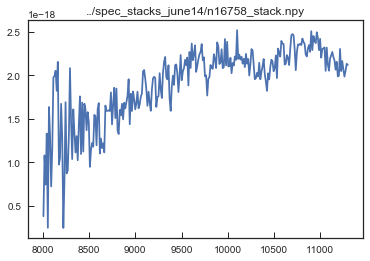

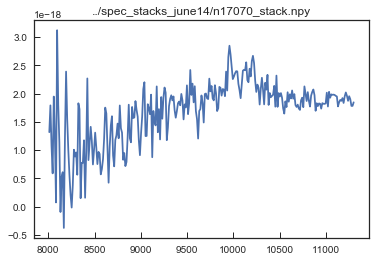

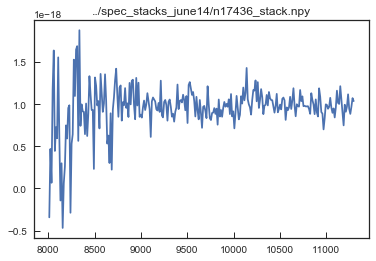

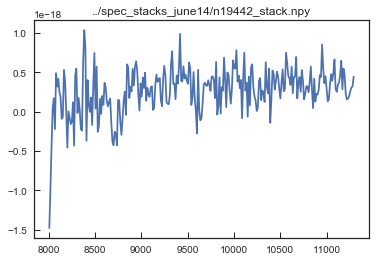

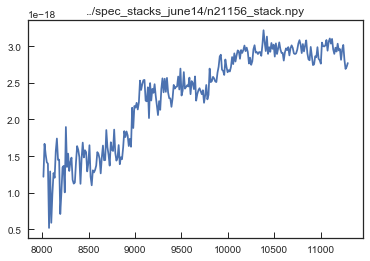

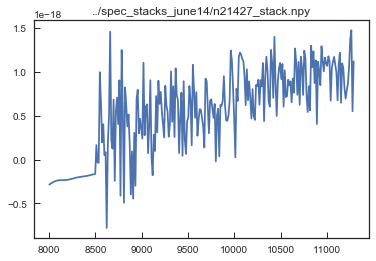

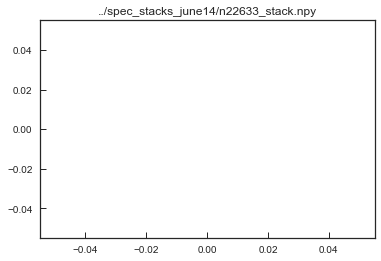

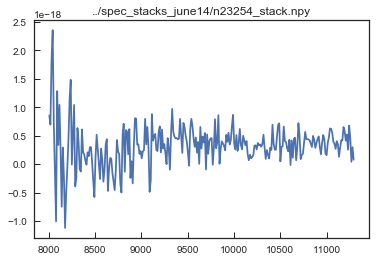

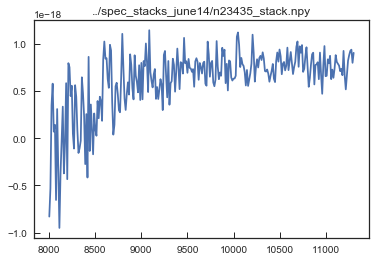

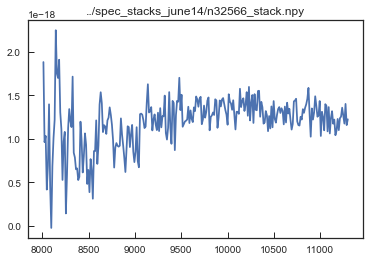

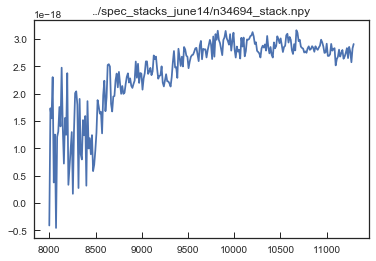

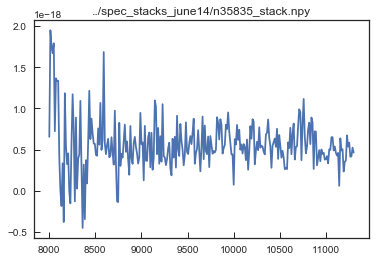

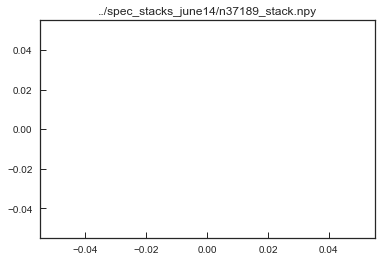

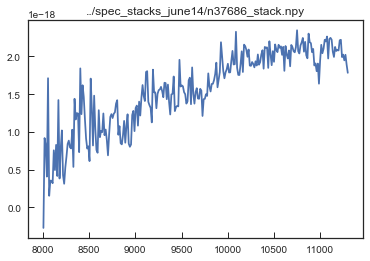

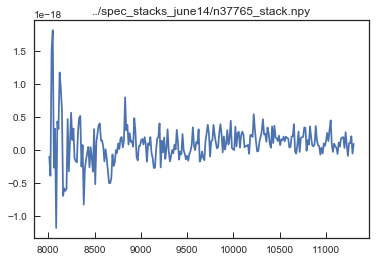

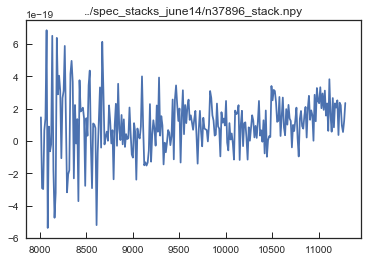

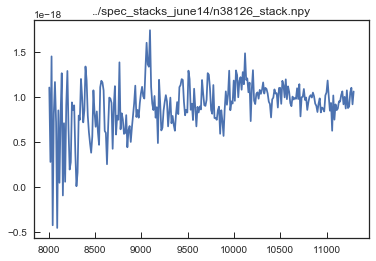

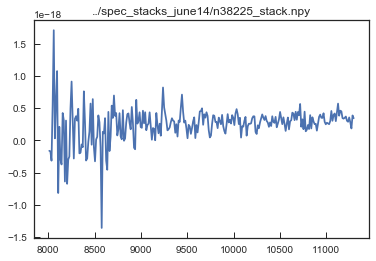

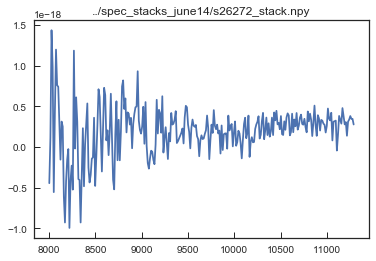

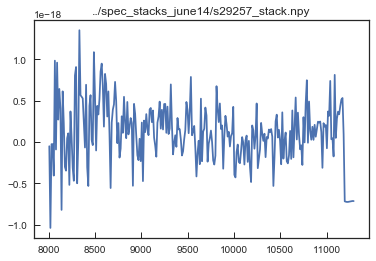

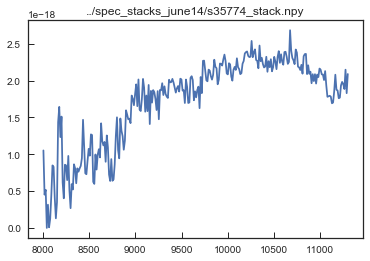

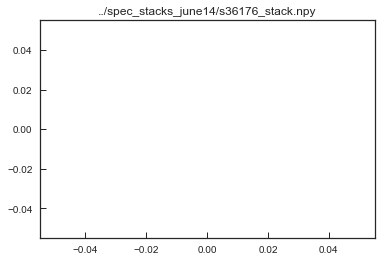

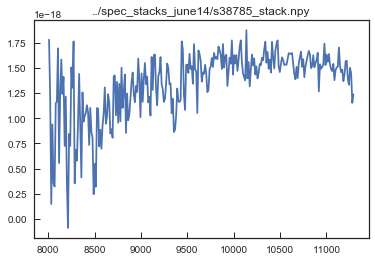

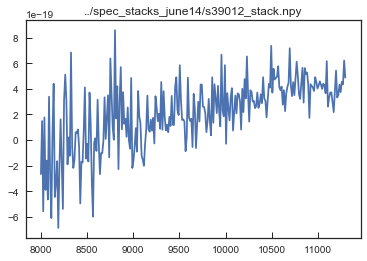

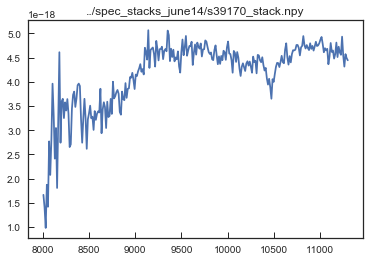

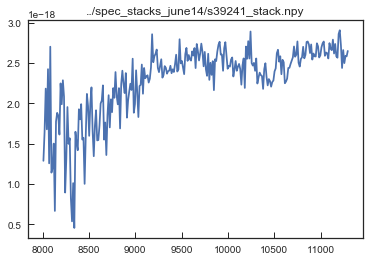

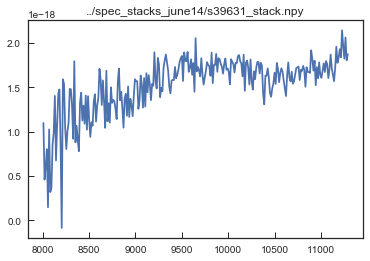

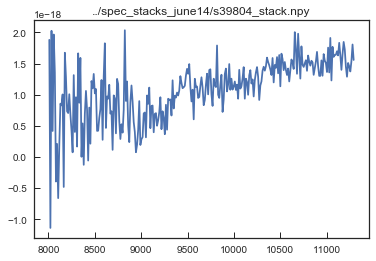

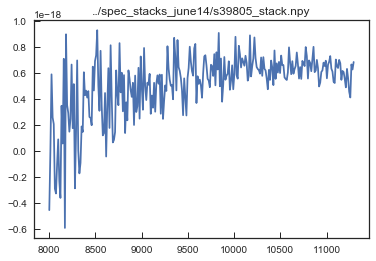

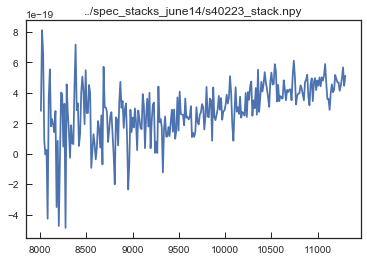

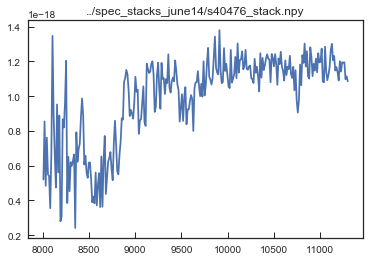

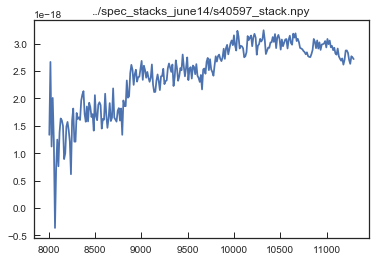

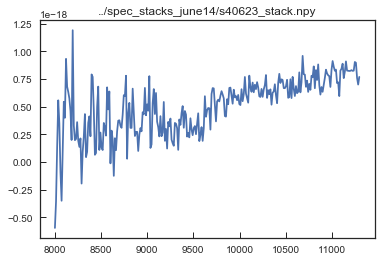

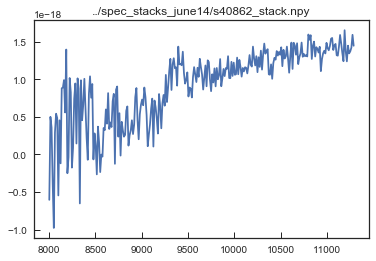

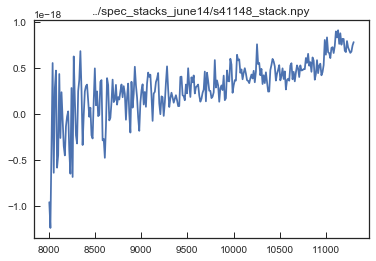

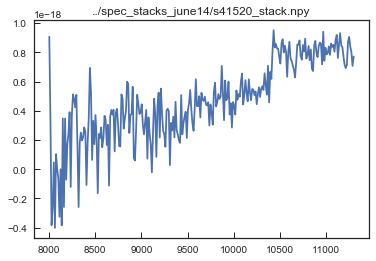

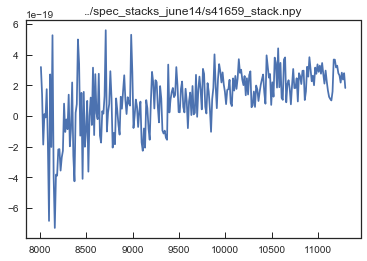

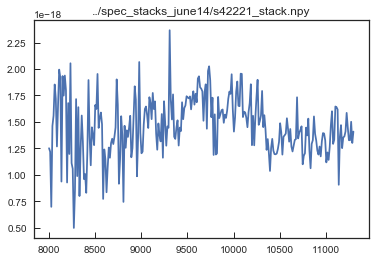

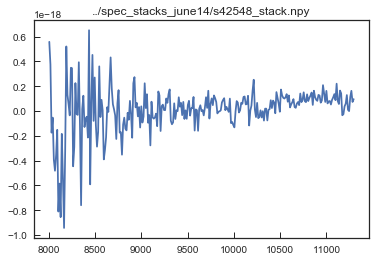

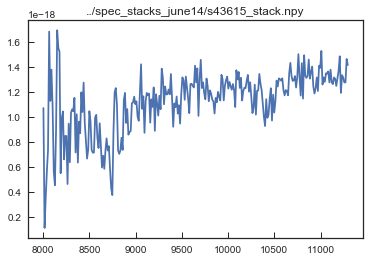

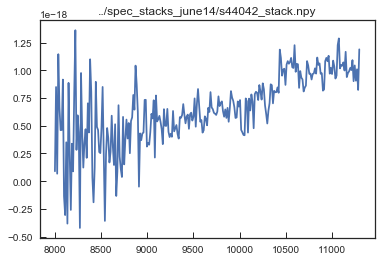

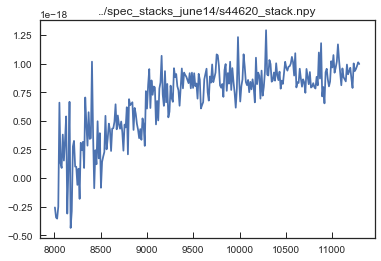

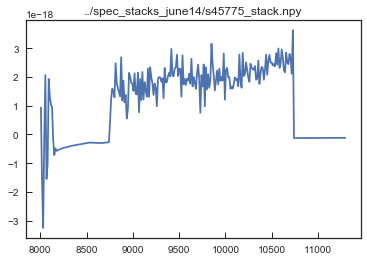

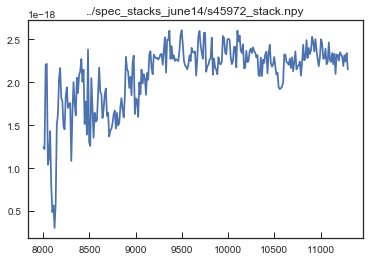

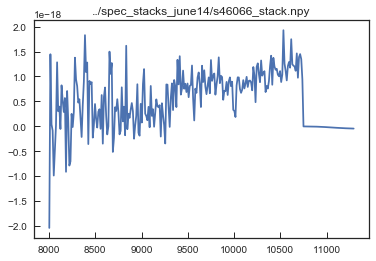

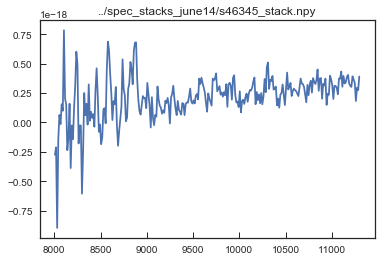

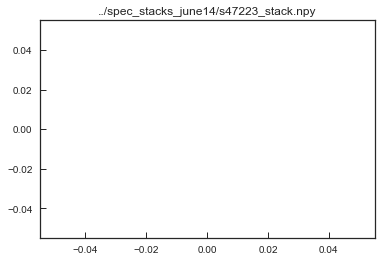

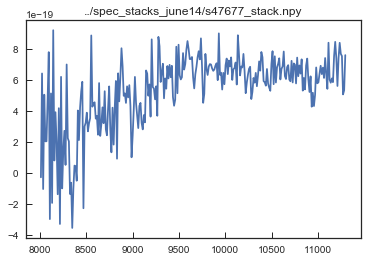

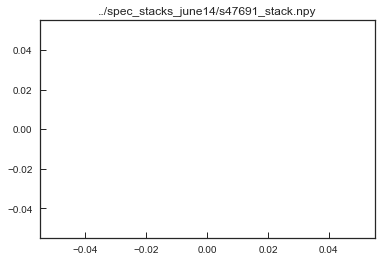

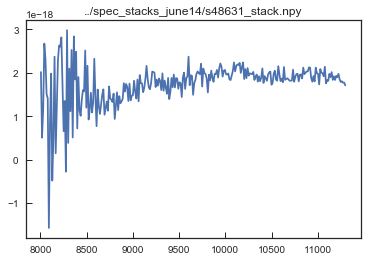

In [15]:
%matplotlib inline
for i in range(len(speclist)):
    wv,fl,er = np.load(speclist[i])
    IDX = [U for U in range(len(wv)) if 8000 < wv[U] < 11300]
    plt.plot(wv[IDX],fl[IDX])
    plt.title(speclist[i])
    plt.show()
    plt.close()